# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
from plotly.offline import iplot

import warnings
warnings.filterwarnings('ignore')

## Dataset

In [5]:
df = pd.read_csv('boxoffice_data_2024.csv')
df

,Year,Title,Gross
0,1984,Beverly Hills Cop,"$234,760,478"
1,1984,Ghostbusters,"$229,376,332"
2,1984,Indiana Jones and the Temple of Doom,"$179,876,727"
3,1984,Gremlins,"$148,171,538"
4,1984,The Karate Kid,"$90,817,155"
...,...,...,...
8140,2024,Irklais per Atlanta,"$1,402,306"
8141,2024,Bramayugam,"$1,388,375"
8142,2024,White Courage,"$1,373,237"
8143,2024,National Theatre Live: The Motive and the Cue,"$1,338,772"


### Analyzing the data

In [7]:
df.shape

(8145, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8145 entries, 0 to 8144
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    8145 non-null   int64 
 1   Title   8145 non-null   object
 2   Gross   8145 non-null   object
dtypes: int64(1), object(2)
memory usage: 191.0+ KB


In [9]:
df.columns

Index(['Year', 'Title', 'Gross'], dtype='object')

In [10]:
df.describe()

,Year
count,8145.000000
mean,2004.132597
std,11.761781
min,1984.000000
25%,1994.000000
50%,2004.000000
75%,2014.000000
max,2024.000000


<Axes: >

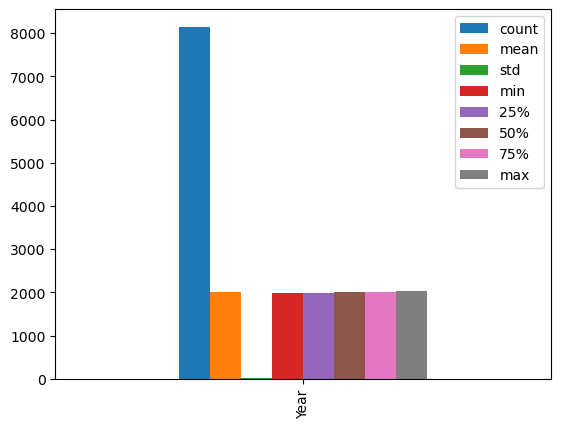

In [16]:
df.describe().T.plot(kind='bar')

In [19]:
df.isna().sum()

Year     0
Title    0
Gross    0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [23]:
df.nunique()

Year       41
Title    7980
Gross    8143
dtype: int64

### Cleaning the data

In [26]:
df

,Year,Title,Gross
0,1984,Beverly Hills Cop,"$234,760,478"
1,1984,Ghostbusters,"$229,376,332"
2,1984,Indiana Jones and the Temple of Doom,"$179,876,727"
3,1984,Gremlins,"$148,171,538"
4,1984,The Karate Kid,"$90,817,155"
...,...,...,...
8140,2024,Irklais per Atlanta,"$1,402,306"
8141,2024,Bramayugam,"$1,388,375"
8142,2024,White Courage,"$1,373,237"
8143,2024,National Theatre Live: The Motive and the Cue,"$1,338,772"


In [28]:
df[['Year']] = df[['Year']].astype('str')

In [30]:
df

,Year,Title,Gross
0,1984,Beverly Hills Cop,"$234,760,478"
1,1984,Ghostbusters,"$229,376,332"
2,1984,Indiana Jones and the Temple of Doom,"$179,876,727"
3,1984,Gremlins,"$148,171,538"
4,1984,The Karate Kid,"$90,817,155"
...,...,...,...
8140,2024,Irklais per Atlanta,"$1,402,306"
8141,2024,Bramayugam,"$1,388,375"
8142,2024,White Courage,"$1,373,237"
8143,2024,National Theatre Live: The Motive and the Cue,"$1,338,772"


In [32]:
df['Gross'] = df['Gross'].str.replace(',', '')
df

,Year,Title,Gross
0,1984,Beverly Hills Cop,$234760478
1,1984,Ghostbusters,$229376332
2,1984,Indiana Jones and the Temple of Doom,$179876727
3,1984,Gremlins,$148171538
4,1984,The Karate Kid,$90817155
...,...,...,...
8140,2024,Irklais per Atlanta,$1402306
8141,2024,Bramayugam,$1388375
8142,2024,White Courage,$1373237
8143,2024,National Theatre Live: The Motive and the Cue,$1338772


In [34]:
df['Gross'] = df['Gross'].str.replace('$', '')
df

,Year,Title,Gross
0,1984,Beverly Hills Cop,234760478
1,1984,Ghostbusters,229376332
2,1984,Indiana Jones and the Temple of Doom,179876727
3,1984,Gremlins,148171538
4,1984,The Karate Kid,90817155
...,...,...,...
8140,2024,Irklais per Atlanta,1402306
8141,2024,Bramayugam,1388375
8142,2024,White Courage,1373237
8143,2024,National Theatre Live: The Motive and the Cue,1338772


In [36]:
df['Gross'] = df['Gross'].astype('int64')

In [38]:
df['Gross'].dtypes

dtype('int64')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8145 entries, 0 to 8144
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    8145 non-null   object
 1   Title   8145 non-null   object
 2   Gross   8145 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 191.0+ KB


## Visualization

### Total Gross by Year

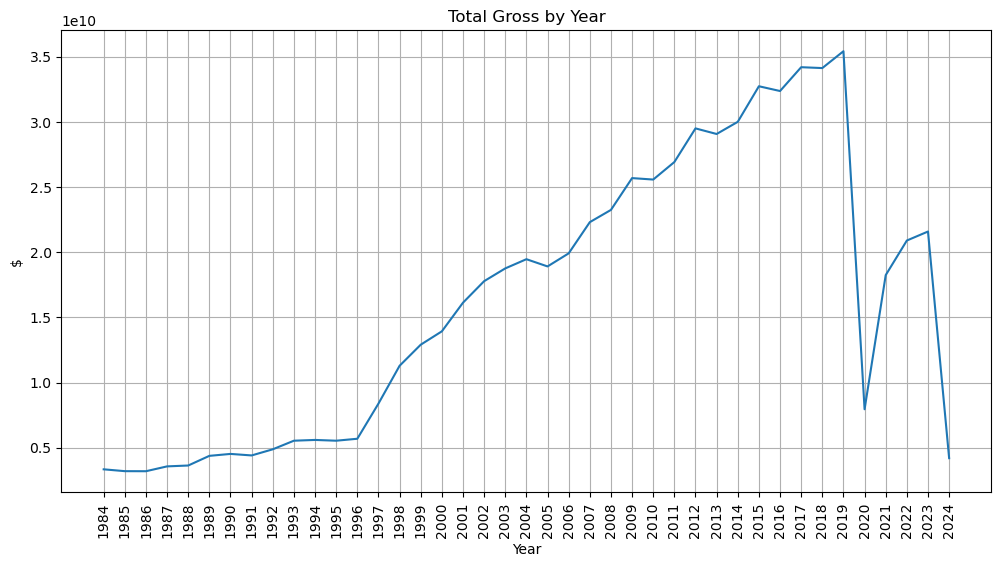

In [58]:
plt.figure(figsize=(12, 6))
df_year = df.groupby(['Year'])[['Gross']].sum()
sns.lineplot(x='Year', y='Gross', data=df_year, palette='blue')
plt.title('Total Gross by Year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('$')
plt.grid()
plt.show()

### Average Gross by Year

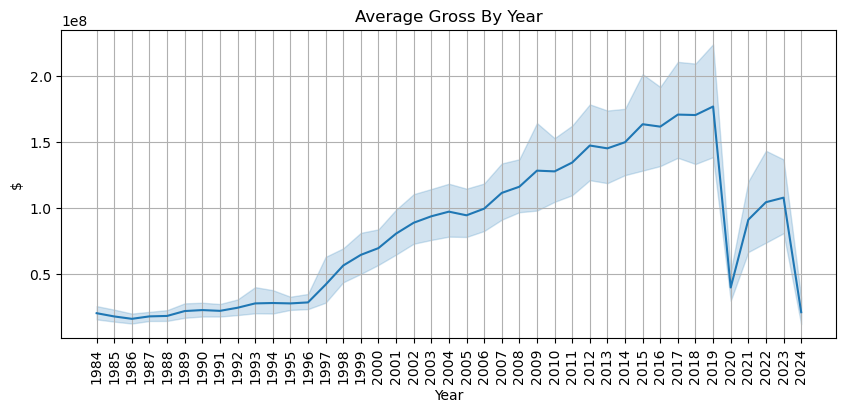

In [56]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='Year', y='Gross', data=df, palette='blue')
plt.title('Average Gross By Year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('$')
plt.grid()
plt.show()

### Boxplot - Gross By Year

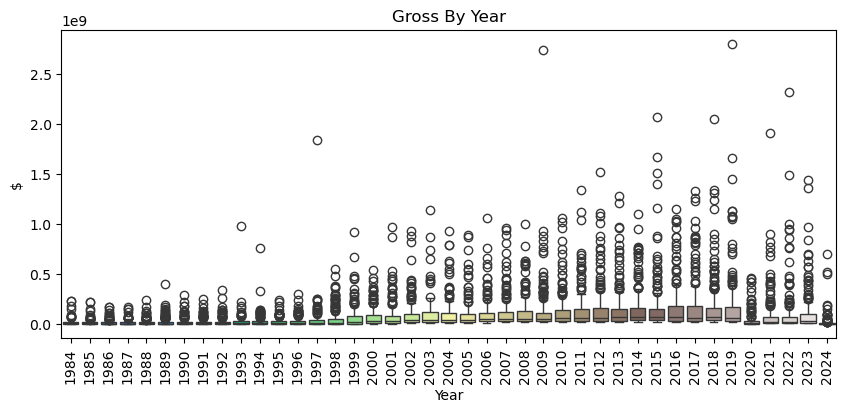

In [60]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Year', y='Gross', data=df, palette='terrain')
plt.title('Gross By Year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('$')
plt.show()

### Top Year Title By Gross

In [65]:
df_top_year = df.drop_duplicates(subset=['Year'])
df_top_year['Year_Title'] = df_top_year['Year'] + ' - ' + df_top_year['Title']
df_top_year

,Year,Title,Gross,Year_Title
0,1984,Beverly Hills Cop,234760478,1984 - Beverly Hills Cop
165,1985,Out of Africa,225526205,1985 - Out of Africa
345,1986,Top Gun,176913085,1986 - Top Gun
545,1987,Three Men and a Baby,167780960,1987 - Three Men and a Baby
745,1988,Who Framed Roger Rabbit,238092487,1988 - Who Framed Roger Rabbit
945,1989,Batman,401188924,1989 - Batman
1145,1990,Home Alone,289012363,1990 - Home Alone
1345,1991,Beauty and the Beast,248802521,1991 - Beauty and the Beast
1545,1992,Aladdin,346476295,1992 - Aladdin
1745,1993,Jurassic Park,978167947,1993 - Jurassic Park


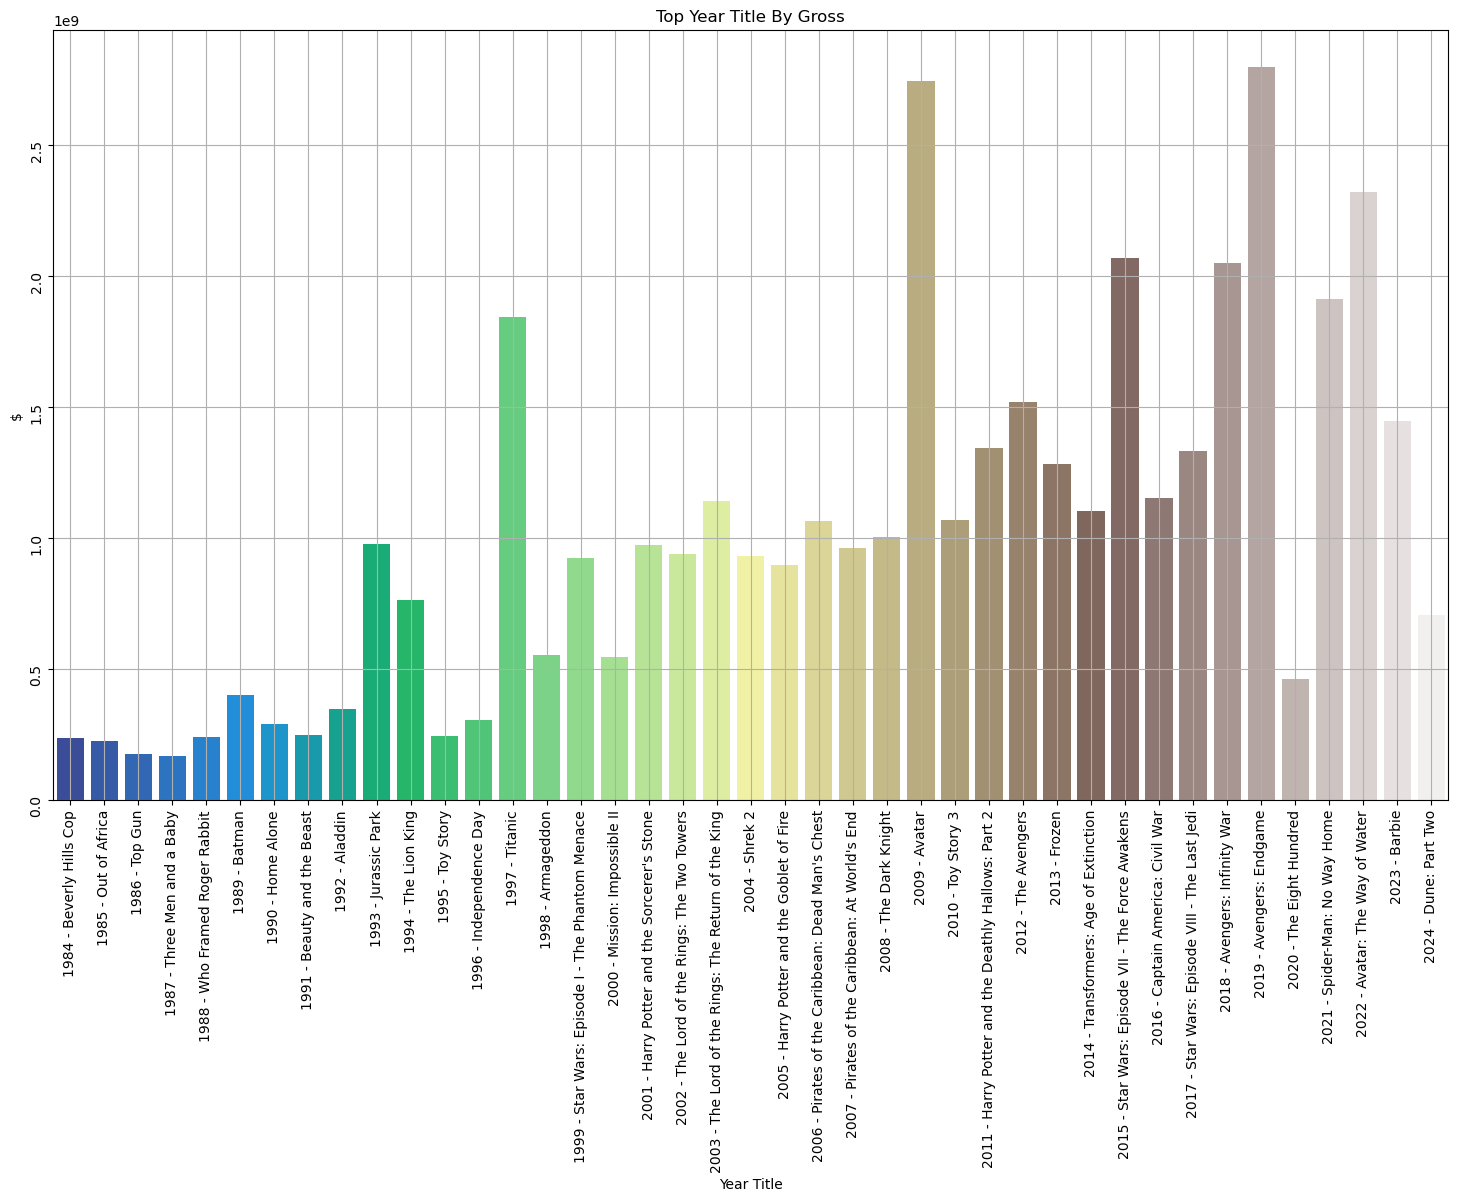

In [83]:
plt.figure(figsize=(18, 10))
sns.barplot(x='Year_Title', y='Gross', data=df_top_year, palette='terrain')
plt.title('Top Year Title By Gross')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=90, fontsize=10)
plt.xlabel('Year Title')
plt.ylabel('$')
plt.grid()
plt.show()

### Highest Year By Gross

In [86]:
colors = ['#F25ED0', '#B3B6B7', '#34495E', '#A3D2A3', '#E6B3B3', '#A3C1AD', '#D9E1C3', '#C7E1A6', '#C70039']

In [105]:
df_year = df.groupby(['Year'])[['Gross']].sum()
df_year = df_year.sort_values(by='Gross', ascending=False)
df_year.head(15)

,Gross
Year,
2019,35428696113
2017,34202321606
2018,34136015106
2015,32741170056
2016,32374797441
2014,30010529897
2012,29507395869
2013,29077739535
2011,26925366220


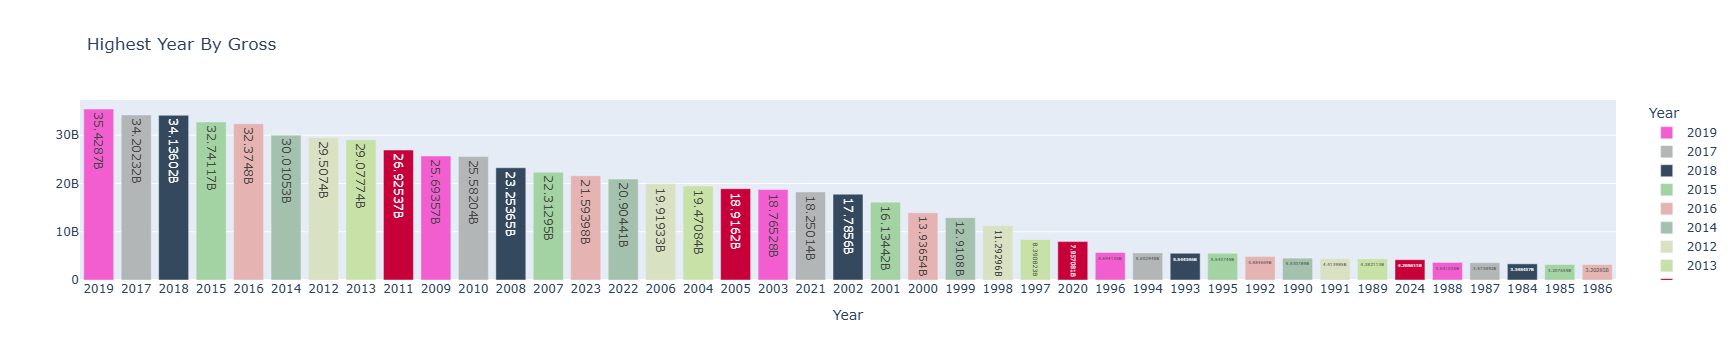

In [107]:
iplot(px.bar(df_year, text_auto=True, color=df_year.index, color_discrete_sequence=colors, labels=dict(index='count names', value=' '), title='Highest Year By Gross'))

### Highest Titles By Gross

In [109]:
df_title = df.groupby(['Title'])[['Gross']].sum()
df_title = df_title.sort_values(by='Gross', ascending=False)
df_title.head(15)

,Gross
Title,
Avengers: Endgame,2799439100
Avatar,2743577587
The Lion King,2420398955
Avatar: The Way of Water,2320250281
Star Wars: Episode VII - The Force Awakens,2068223624
Avengers: Infinity War,2048359754
Spider-Man: No Way Home,1912233593
Titanic,1843373318
Jurassic World,1670400637


In [ ]:
iplot(px.bar(df_title, text_auto=True, color=df_title.index, color_discrete_sequence=colors, labels=dict(index='count names', value=' '), title='Highest Title By Gross'))